In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Use SQLAlchemy automap_base() to reflect your tables into classes 
# and save a reference to those classes called Station and Measurement.
Base = automap_base()
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [48]:
# Design a query to retrieve the last 12 months of precipitation data. 
# Select only the date and prcp values.

date_first = session.query(Measurement.date).order_by(Measurement.date).first().date
date_last = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last12mths = dt.datetime.strptime(date_last, '%Y-%m-%d') - dt.timedelta(days=365)
prcp_last12mths = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= last12mths).\
                    order_by(Measurement.date).all()

prcp_last12mths

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [49]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
prcp_last12mths_df = pd.DataFrame(prcp_last12mths, columns=['Date', 'Precipitation'])
prcp_last12mths_df.set_index('Date', inplace=True)

# Sort the DataFrame values by date.
prcp_last12mths_df.sort_values('Date')

prcp_last12mths_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<function matplotlib.pyplot.show(*args, **kw)>

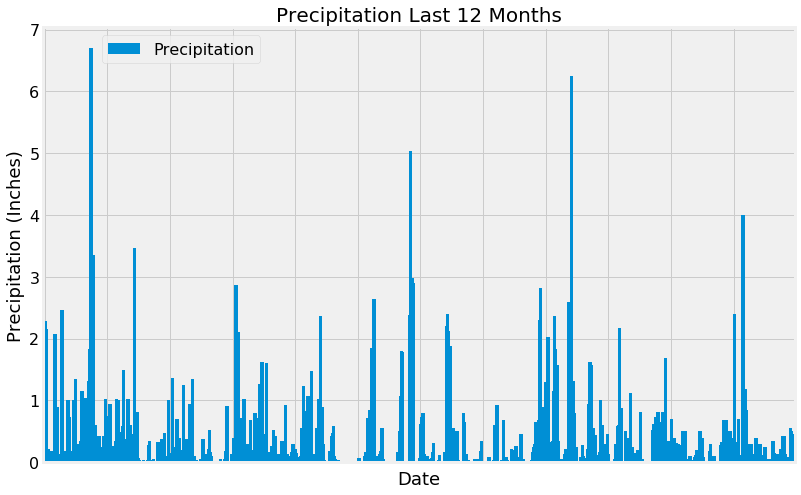

In [53]:
# Plot the results using the DataFrame plot method.

ax = prcp_last12mths_df.plot(kind='bar', width=10, figsize=(12,8))
plt.locator_params(axis='x', nbins=12)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig("Output/prcp_last12mths.png")
plt.show

In [54]:
# Use Pandas to print the summary statistics for the precipitation data.

prcp_last12mths_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [55]:
# Design a query to calculate the total number of stations.

session.query(Station.id).count()

9

In [56]:
# Design a query to find the most active stations. 
# List the stations and observation counts in descending order.

station_observations = session.query(Measurement.station,\
            func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station_observations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Which station has the highest number of observations? 

station_max = station_observations[0][0]
station_max

'USC00519281'

<function matplotlib.pyplot.show(*args, **kw)>

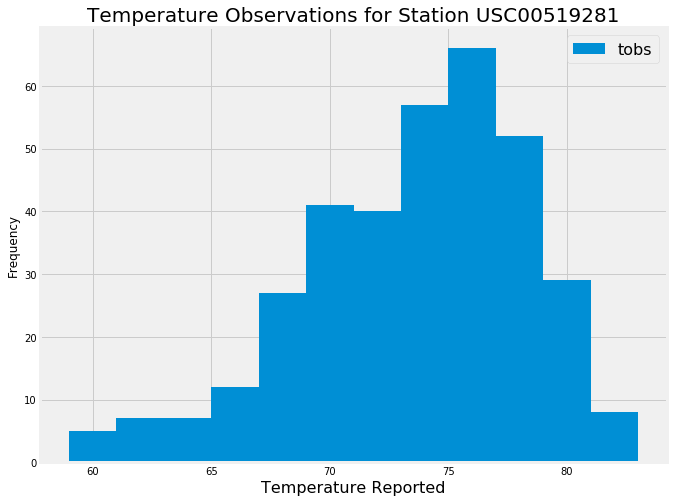

In [58]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.

tobs_last12mths = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date >= last12mths).\
                    filter(Measurement.station == station_max).all()
tobs_last12mths_df = pd.DataFrame(tobs_last12mths)
  
# Plot the results as a histogram with bins=12.

tobs_last12mths_df.plot.hist(by='station', bins=12, figsize=(10,8))
plt.grid(True)
plt.title("Temperature Observations for Station " + station_max, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("Output/tobs_last12mths.png")
plt.show
